<a href="https://colab.research.google.com/github/Bhavya-2k03/Combined_CNN_and_ELM_for_Image_classification/blob/main/CNN%2BELM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# cnn+elm

In [2]:
!pip install hpelm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 2.9 MB/s 
     |████████████████████████████████| 154 kB 10.2 MB/s 


In [47]:
import hpelm
import tensorflow as tf
import sklearn
import seaborn as sn
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Dense,MaxPool2D,GlobalAveragePooling2D,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import numpy as np
from keras.utils import np_utils
from sklearn.metrics import precision_recall_fscore_support,accuracy_score

In [48]:
digit=load_digits()

In [49]:
data=digit.data
target=digit.target

In [50]:
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.3)

In [51]:
x_train=x_train/255
x_test=x_test/255

In [52]:
x_train=np.reshape(x_train,(x_train.shape[0],8,8,1))
x_test=np.reshape(x_test,(x_test.shape[0],8,8,1))

In [53]:
print(x_train.shape,x_test.shape)

(1257, 8, 8, 1) (540, 8, 8, 1)


In [72]:
model=tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(8,8,1)))
model.add(Conv2D(16,3,padding="same",activation="relu"))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(16,2,padding="same",activation="relu"))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(8,2,padding="same",activation="relu"))
model.add(MaxPool2D((2,2)))
# model.add(GlobalAveragePooling2D())
model.add(Flatten(name="flatten_1"))
model.add(Dense(10,activation="softmax"))


In [73]:
model.compile(loss="sparse_categorical_crossentropy",optimizer=Adam(),metrics=["accuracy"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 8, 8, 16)          160       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 4, 4, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 4, 4, 16)          1040      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 2, 2, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 2, 2, 8)           520       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 1, 1, 8)         

In [56]:
model.fit(x_train,y_train,batch_size=20,epochs=150,validation_split=0.3,verbose=1,callbacks=tf.keras.callbacks.EarlyStopping(patience=15,monitor="val_accuracy"))

Epoch 1/150
44/44 [==============================] - 1s 10ms/step - loss: 2.3027 - accuracy: 0.1035 - val_loss: 2.3005 - val_accuracy: 0.1640
Epoch 2/150
44/44 [==============================] - 0s 5ms/step - loss: 2.2995 - accuracy: 0.2218 - val_loss: 2.2980 - val_accuracy: 0.1587
Epoch 3/150
44/44 [==============================] - 0s 5ms/step - loss: 2.2945 - accuracy: 0.1991 - val_loss: 2.2905 - val_accuracy: 0.2037
Epoch 4/150
44/44 [==============================] - 0s 4ms/step - loss: 2.2821 - accuracy: 0.2253 - val_loss: 2.2738 - val_accuracy: 0.2063
Epoch 5/150
44/44 [==============================] - 0s 5ms/step - loss: 2.2544 - accuracy: 0.2184 - val_loss: 2.2361 - val_accuracy: 0.1561
Epoch 6/150
44/44 [==============================] - 0s 5ms/step - loss: 2.1993 - accuracy: 0.2457 - val_loss: 2.1740 - val_accuracy: 0.2328
Epoch 7/150
44/44 [==============================] - 0s 4ms/step - loss: 2.1159 - accuracy: 0.2355 - val_loss: 2.0888 - val_accuracy: 0.2434
Epoch 8/150


In [74]:
hidden_layer_model=Model(inputs=model.input,outputs=model.get_layer("flatten_1").output)
cnn_train_result=hidden_layer_model.predict(x_train)

In [61]:
# print(cnn_train_result[0])

[3.7267792  0.         0.83910847 2.8680727  4.0251436  1.742605
 0.7380286  2.3869326 ]


In [59]:
y_train_oh=np_utils.to_categorical(y_train,10)

In [60]:
cnn_train_result.shape

(1257, 8)

In [61]:
x_train.shape

(1257, 8, 8, 1)

In [62]:
elm_model=hpelm.elm.ELM(8,10)
elm_model.add_neurons(150,func="sigm")
elm_model.train(cnn_train_result,y_train_oh,"c")

Covariance matrix is not full rank; solving with SVD (slow)
This happened because you have duplicated or too many neurons


/usr/local/lib/python3.7/dist-packages/hpelm/nnets/slfn_python.py:65: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  B = np.linalg.lstsq(HH, HT)[0]


In [63]:
cnn_result=hidden_layer_model.predict(x_test)
final_result=elm_model.predict(cnn_result)
# print(final_result[0])

In [87]:
# print(final_result[2])

[-0.00206318 -0.03071092 -0.03225942 -0.03767784  0.10475771 -0.03310201
 -0.03900965  0.26304077  0.0104062   0.79661834]


In [64]:
final_result_class=[np.argmax(i) for i in final_result]

In [65]:
print(final_result_class)

[4, 2, 0, 7, 9, 3, 5, 5, 0, 5, 3, 1, 4, 1, 7, 7, 7, 5, 8, 2, 6, 5, 8, 8, 9, 0, 0, 1, 9, 8, 8, 5, 0, 6, 4, 0, 6, 0, 2, 7, 4, 3, 0, 0, 9, 5, 1, 2, 6, 3, 7, 8, 1, 4, 8, 9, 8, 3, 2, 4, 8, 1, 9, 6, 6, 5, 3, 0, 1, 1, 6, 5, 0, 5, 8, 4, 7, 8, 7, 9, 0, 1, 8, 4, 2, 0, 1, 0, 3, 3, 9, 5, 3, 6, 8, 0, 6, 3, 3, 4, 0, 1, 0, 6, 2, 1, 1, 9, 6, 5, 9, 8, 0, 8, 4, 9, 2, 4, 6, 3, 0, 5, 8, 5, 1, 3, 5, 2, 9, 7, 3, 1, 6, 3, 3, 1, 1, 8, 7, 8, 4, 4, 5, 8, 8, 8, 9, 5, 2, 4, 7, 3, 9, 0, 2, 7, 2, 2, 0, 6, 3, 5, 8, 0, 9, 8, 6, 8, 1, 6, 0, 1, 8, 2, 1, 3, 7, 3, 4, 0, 5, 5, 5, 6, 1, 3, 5, 5, 7, 5, 9, 8, 4, 4, 7, 5, 4, 0, 4, 5, 8, 9, 7, 4, 0, 7, 0, 4, 3, 7, 3, 3, 9, 7, 3, 4, 6, 4, 8, 5, 2, 8, 7, 3, 3, 7, 6, 4, 0, 3, 9, 1, 6, 1, 0, 5, 1, 3, 9, 4, 8, 9, 0, 1, 3, 1, 0, 4, 6, 2, 1, 2, 8, 5, 9, 9, 6, 0, 2, 5, 1, 2, 4, 2, 6, 0, 8, 6, 4, 4, 8, 3, 2, 5, 6, 4, 9, 7, 2, 8, 6, 1, 7, 6, 8, 3, 1, 0, 9, 3, 3, 9, 7, 1, 1, 3, 4, 6, 6, 7, 8, 3, 1, 1, 4, 5, 0, 4, 4, 0, 4, 2, 4, 7, 4, 6, 5, 0, 9, 8, 2, 0, 3, 4, 7, 1, 3, 1, 1, 3, 6, 2, 0, 

In [66]:
y_test_oh=np_utils.to_categorical(y_test,10)

In [67]:
cm=elm_model.confusion(y_test_oh,final_result)

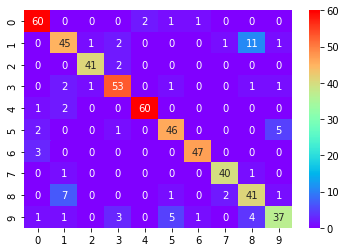

In [68]:
sn.heatmap(cm,annot=True,cmap="rainbow")
plt.show()


In [69]:
precision,recall,f_score,support=precision_recall_fscore_support(y_test,final_result_class)
print(precision)

[0.89552239 0.77586207 0.95348837 0.86885246 0.96774194 0.85185185
 0.95918367 0.93023256 0.70689655 0.82222222]


In [70]:
accuracy=accuracy_score(y_test,final_result_class)

In [71]:
print(accuracy)

0.8703703703703703
